<a href="https://colab.research.google.com/github/samantha-isaac/Music_Genre_Classification_Neural_Computing/blob/main/MusicClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Comparative Study of Multilayer Perceptrons and Support Vector Machines in Musical Genre Classification

By Samantha Georgina Isaac Munoz (230057658)




https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre

# Loading of the data and Initial Exploration

In [2]:
# I load the basic libraries needed for data loading, data exploration and for the elaboration of graphs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load of the data
file = '/content/drive/MyDrive/M.S. Data Science/NECO_FINAL/Dataset/music_genre.csv' # This line you'll need to modify accoring to your directory
df = pd.read_csv(file)
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
df.info() # I first perform a basic exploration of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [5]:
df.nunique() # I search in general if there are any strange or out of place values in each feature.

instance_id         50000
artist_name          6863
track_name          41699
popularity             99
acousticness         4193
danceability         1088
duration_ms         26028
energy               2085
instrumentalness     5131
key                    12
liveness             1646
loudness            17247
mode                    2
speechiness          1337
tempo               29394
obtained_date           5
valence              1615
music_genre            10
dtype: int64

In [6]:
# I count the total number of labels by genre of music
genera_count = df['music_genre'].value_counts()
genera_count

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64

# Cleaning

### Note


*   Delete name of the Artist, Song and Date obtained
*   One hot encoder for Key and Mode
*   Eliminate the duplicated rows
*   Eliminate rows with null values
*   Check the values and their type for the value tempo



In [7]:
df.duplicated().sum() # Number of duplicate rows

4

In [8]:
df = df.drop_duplicates() # I drop the duplicate rows, as there are only 4 of them, they don't affect the dataset or the results at all

In [9]:
df.isnull().sum() # I search for null values in the dataset, there's only 1 row with null values

instance_id         1
artist_name         1
track_name          1
popularity          1
acousticness        1
danceability        1
duration_ms         1
energy              1
instrumentalness    1
key                 1
liveness            1
loudness            1
mode                1
speechiness         1
tempo               1
obtained_date       1
valence             1
music_genre         1
dtype: int64

In [10]:
df.dropna(inplace = True) # I deleted the row with the null value since it's only one row.

<ipython-input-10-d20aea5e017a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True) # I deleted the row with the null value since it's only one row.


In [11]:
# I delete the columns that are irrelevant to the project, which are mainly string values
df = df.drop(columns = ['instance_id', 'artist_name', 'track_name', 'obtained_date'])

In [12]:
# I check the number of rows that have the tempo as a interrogation symbol
tempo_weird = df.loc[df['tempo'] == '?']
tempo_weird.shape

(4980, 14)

In [13]:
# I convert the values into floats and the values with '?' i convert them into NaN, then I get the mean of the tempo of each genre so I
# can assign the mean to the respective genre on the NaN values.
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
tempo_by_genre = df.groupby('music_genre')['tempo'].transform('mean')
df['tempo'].fillna(tempo_by_genre, inplace=True)

# Visualisation of the data

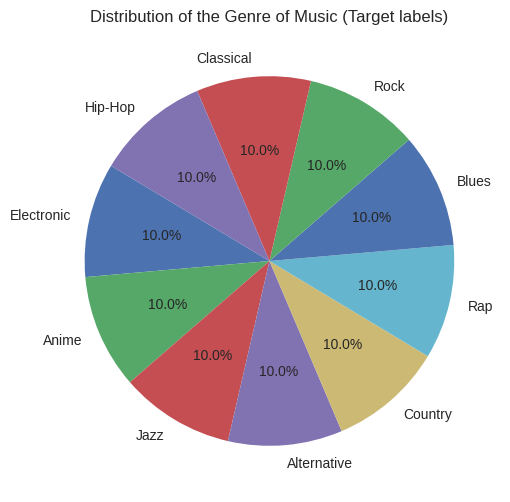

In [14]:
plt.style.use('seaborn-v0_8') # I choose a seaborn style for the graphics
# I initialise and generate a pie chart to show the distribution of the labels to be classified
fig1 = plt.figure(dpi = 100, figsize = (8, 6))
ax1 = fig1.add_subplot(1,1,1)


ax1.pie(genera_count, labels = genera_count.index, autopct = '%1.1f%%', startangle = 149)
plt.title('Distribution of the Genre of Music (Target labels)')
plt.show();

### Popularity per Genre

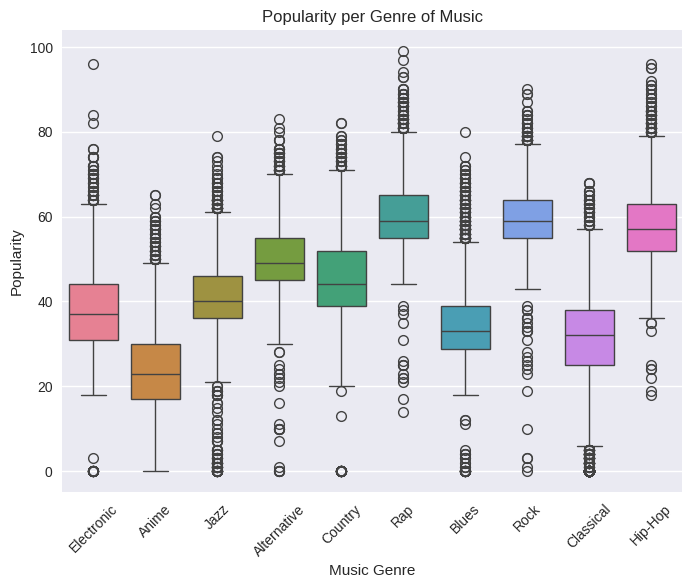

In [15]:
# Create a boxplot to observe relevant insights of each music genre on specific features (in this case is Popularity)
plt.figure(dpi = 100, figsize = (8, 6))
sns.boxplot(x = 'music_genre', y = 'popularity', data = df, hue = 'music_genre', legend = False)
plt.title('Popularity per Genre of Music')
plt.xlabel('Music Genre')
plt.ylabel('Popularity')
plt.xticks(rotation = 45)
plt.show();

In [16]:
df.groupby('music_genre')['popularity'].describe() # Table of the general descriptions by feature of all the music genre

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,50.2242,7.664260,0.0,45.00,49.0,55.0,83.0
Anime,5000.0,24.2716,9.675151,0.0,17.00,23.0,30.0,65.0
Blues,5000.0,34.8040,9.716422,0.0,28.75,33.0,39.0,80.0
Classical,5000.0,29.3158,14.100519,0.0,25.00,32.0,38.0,68.0
Country,5000.0,46.0100,9.771540,0.0,39.00,44.0,52.0,82.0
Electronic,5000.0,38.1118,9.715378,0.0,31.00,37.0,44.0,96.0
Hip-Hop,5000.0,58.3996,8.302271,18.0,52.00,57.0,63.0,96.0
Jazz,5000.0,40.9286,9.517333,0.0,36.00,40.0,46.0,79.0
Rap,5000.0,60.4974,8.160620,14.0,55.00,59.0,65.0,99.0


### Tempo per Genre

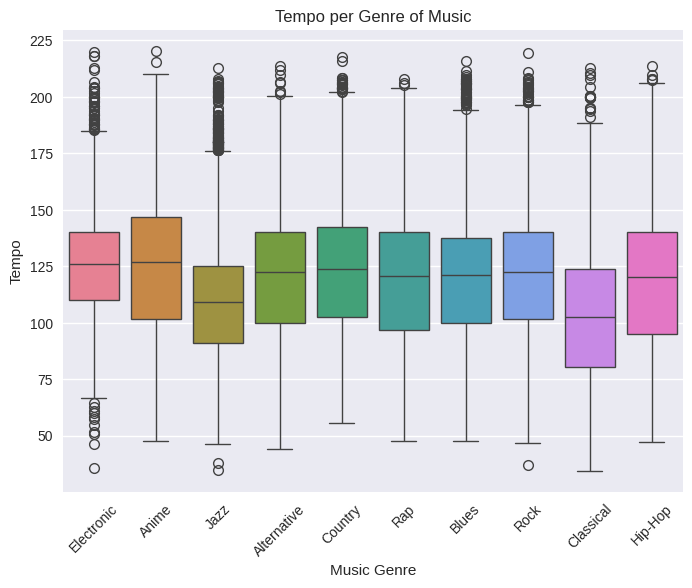

In [17]:
# Create a boxplot to observe relevant insights of each music genre on specific features (in this case is Tempo)
plt.figure(dpi = 100, figsize = (8, 6))
sns.boxplot(x = 'music_genre', y = 'tempo', data = df, hue = 'music_genre', legend = False)
plt.title('Tempo per Genre of Music')
plt.xlabel('Music Genre')
plt.ylabel('Tempo')
plt.xticks(rotation = 45)
plt.show();

In [18]:
df.groupby('music_genre')['tempo'].describe() # Table of the general descriptions by feature of all the music genre

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,122.547235,28.655457,44.194,99.97650,122.547235,140.27625,213.788
Anime,5000.0,126.799978,31.355946,47.704,101.56700,126.799978,146.86650,220.276
Blues,5000.0,121.379962,28.674042,47.587,99.90150,121.379962,137.59650,215.918
Classical,5000.0,104.053190,29.356160,34.347,80.53150,102.634000,123.82775,212.923
Country,5000.0,123.784286,28.493925,55.513,102.74075,123.784286,142.52900,217.538
Electronic,5000.0,125.930571,25.027649,35.551,110.07500,125.930571,140.20875,220.041
Hip-Hop,5000.0,120.154134,28.411356,47.092,95.04975,120.154134,140.01025,213.788
Jazz,5000.0,111.699415,28.191816,34.765,91.06125,109.403000,125.14200,213.038
Rap,5000.0,120.585501,27.789235,47.811,96.78100,120.585501,140.00125,207.986


### Energy per Genre

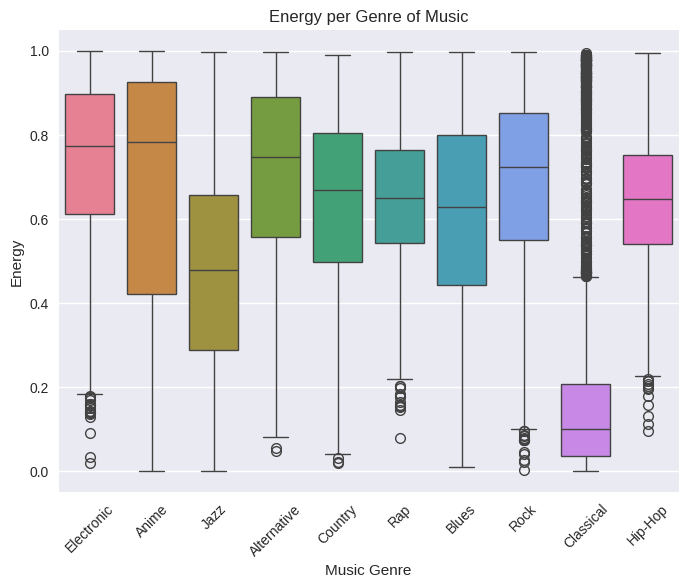

In [19]:
# Create a boxplot to observe relevant insights of each music genre on specific features (in this case is Energy)
plt.figure(dpi = 100, figsize = (8, 6))
sns.boxplot(x = 'music_genre', y = 'energy', data = df, hue = 'music_genre', legend = False)
plt.title('Energy per Genre of Music')
plt.xlabel('Music Genre')
plt.ylabel('Energy')
plt.xticks(rotation = 45)
plt.show();

In [20]:
df.groupby('music_genre')['energy'].describe() # Table of the general descriptions by feature of all the music genre

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,0.710880,0.206841,0.048400,0.55700,0.7470,0.89025,0.998
Anime,5000.0,0.664568,0.300289,0.000943,0.42200,0.7830,0.92500,0.999
Blues,5000.0,0.609753,0.227894,0.009570,0.44400,0.6290,0.80000,0.998
Classical,5000.0,0.176534,0.225583,0.000792,0.03660,0.1010,0.20700,0.994
Country,5000.0,0.638903,0.199112,0.021000,0.49800,0.6700,0.80400,0.991
Electronic,5000.0,0.738636,0.187862,0.021100,0.61100,0.7730,0.89700,0.999
Hip-Hop,5000.0,0.644334,0.150461,0.095200,0.54175,0.6475,0.75300,0.995
Jazz,5000.0,0.474847,0.239362,0.002110,0.28900,0.4780,0.65700,0.997
Rap,5000.0,0.651301,0.156123,0.079300,0.54275,0.6490,0.76300,0.997


In [21]:
# Correlation heatmap for the numerical features in the dataset
corr = df.corr()
sns.heatmap(corr, annot = True)

ValueError: could not convert string to float: 'A#'

# Pre-Procesing

In [22]:
# Libraries for the pre-procesing of the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [23]:
# Separate the dataset into features x and the target label y
X = df.drop(columns = ['music_genre'])
y = df['music_genre']

In [24]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [25]:
# Define categorical and numerical columns
categorical_columns = ['mode', 'key']
numeric_columns = X.drop(columns=categorical_columns).columns.tolist()

In [27]:
# I define the standardiser and the EHO for numerical and categorical data respectively
scaler = StandardScaler()
ohe = OneHotEncoder()

In [28]:
# I set the first pipeline for the numerical values
# This code was obtain from notes from my previous bootcamp and https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
num_pipeline = make_pipeline(scaler)
num_pipeline

Pipeline(steps=[('standardscaler', StandardScaler())])

In [29]:
# I set the second pipeline for the categorical values
cat_pipeline = make_pipeline(ohe)
cat_pipeline

Pipeline(steps=[('onehotencoder', OneHotEncoder())])

In [30]:
# tuples so that they can be put into the processor
num_tuple = (num_pipeline, numeric_columns)
cat_tuple = (cat_pipeline, categorical_columns)

In [31]:
# Create the column transformer to apply the corresponding transformations
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['popularity', 'acousticness', 'danceability',
                                  'duration_ms', 'energy', 'instrumentalness',
                                  'liveness', 'loudness', 'speechiness',
                                  'tempo', 'valence']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['mode', 'key'])])

In [32]:
preprocessor.fit(X_train) # Fitting the preprocessor on the x train set

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['popularity', 'acousticness', 'danceability',
                                  'duration_ms', 'energy', 'instrumentalness',
                                  'liveness', 'loudness', 'speechiness',
                                  'tempo', 'valence']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['mode', 'key'])])

In [33]:
# Transform training and test X-sets
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [34]:
df_processed = pd.DataFrame(X_train_processed) # I verify that the data is correctly trasnformed
df_processed

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.624744,-0.685575,-0.659750,-1.769127,0.034470,-0.559072,2.383526,0.050821,-0.569348,1.557701,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.044676,1.960270,-0.112836,3.510208,-2.267897,1.739334,-0.916636,-3.854580,1.646813,0.542327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.042687,-0.853560,1.047960,-0.137116,0.852430,-0.526194,-0.452215,0.725941,0.753200,1.136624,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.495840,1.643648,0.037844,0.275269,-0.276052,-0.558752,-0.630602,0.379938,-0.530625,-0.890479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.986555,2.013040,-1.407570,-0.117810,-1.970288,2.267845,0.015283,-2.461638,-0.391618,-0.303818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,-0.084228,-0.684988,-0.252355,0.354643,0.617645,2.264772,-0.187710,0.277972,-0.358852,-0.280999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34996,-0.148680,-0.824536,-1.574992,1.555802,0.477532,1.954426,-0.626296,0.399260,-0.459136,-1.592023,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34997,1.269263,0.447521,-0.882980,-0.892106,0.825922,-0.559062,-0.384551,-0.341132,-0.130485,1.596603,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34998,-1.115459,-0.572705,-0.196547,0.059188,1.151591,0.267494,0.593503,0.990274,5.112047,0.208498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Procesamiento para Pytorch

In [35]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [36]:
# Create the encoder and adjust it to the training labels
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# y_train_encoded and y_test_encoded are arrays of integers that you can convert to PyTorch tensors
# This was obtained from https://pytorch.org/docs/stable/tensors.html
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

In [37]:
# Show assignment of music genre to numerical value
genre_to_number = {label: index for index, label in enumerate(label_encoder.classes_)}
print(genre_to_number)

{'Alternative': 0, 'Anime': 1, 'Blues': 2, 'Classical': 3, 'Country': 4, 'Electronic': 5, 'Hip-Hop': 6, 'Jazz': 7, 'Rap': 8, 'Rock': 9}


In [38]:
# Converting processed datasets to PyTorch tensors. This was also obtained from https://medium.com/analytics-vidhya/pytorch-101-with-torch-tensors-2b7d5d7e2f21
X_train_tensor = torch.tensor(X_train_processed.astype(np.float32))
y_train_tensor = torch.tensor(y_train_encoded, dtype = torch.long)

X_test_tensor = torch.tensor(X_test_processed.astype(np.float32))
y_test_tensor = torch.tensor(y_test_encoded, dtype = torch.long)

# MLP

**Baseline for the MLP**

In [39]:
# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

# Defining the MLP model. References I use: https://pytorch.org/docs/stable/nn.html
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size): # This is the 'MLP' class constructor
        super(MLP, self).__init__() # This line is for PyTorch to initialise the 'MLP' class as a neural network
        self.fc1 = nn.Linear(input_size, hidden_sizes[0]) # This line creates the first linear layer and assigns it as an attribute of the instance
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1]) # Similar to the previous line, this line creates the second linear layer that transforms the data of the first hidden layer to the size of the second hidden layer
        self.fc3 = nn.Linear(hidden_sizes[1], output_size) # This line creates the third and last linear layer that will transform the data of the second hidden layer to the output size

    def forward(self, x): # Defines the forward propagation logic
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# This block creates the MLP model
input_size = X_train_processed.shape[1]
hidden_sizes = [100, 100]
output_size = len(y_train.unique())

model = MLP(input_size, hidden_sizes, output_size)

# Defining the loss function and the optimiser
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Function to calculate the accuracy
def calculate_accuracy(y_true, y_pred):
    _, predicted = torch.max(y_pred, 1)
    correct = (predicted == y_true).sum().item()
    return correct / y_true.size(0)

# An empty list is initialised to store train and test losses
train_losses = []
test_losses = []

# Training of the model. Reference from: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html
epochs = 50 # Stablish the number of epochs
for epoch in range(epochs):
    model.train() # The model is set to training mode
    train_loss = 0.0
    train_acc = 0.0
    for inputs, labels in train_loader: # All data batches are run through
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # Calculate the loss gradients with respect to the model parameters
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        train_acc += calculate_accuracy(labels, outputs) * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)

    model.eval() # The model is put into evaluation mode. Reference from: https://discuss.pytorch.org/t/where-to-use-model-eval/89200
    test_loss = 0.0
    test_acc = 0.0
    with torch.no_grad(): # This avoid the calculation of gradients during evaluation, to memory consumption and speeds up the process
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            test_acc += calculate_accuracy(labels, outputs) * inputs.size(0)

    test_loss /= len(test_loader.dataset)
    test_acc /= len(test_loader.dataset)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_acc:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_acc:.2f}')

Epoch 1/50, Train Loss: 1.36, Train Accuracy: 0.49, Test Loss: 1.20, Test Accuracy: 0.54
Epoch 2/50, Train Loss: 1.18, Train Accuracy: 0.55, Test Loss: 1.17, Test Accuracy: 0.56
Epoch 3/50, Train Loss: 1.14, Train Accuracy: 0.56, Test Loss: 1.14, Test Accuracy: 0.56
Epoch 4/50, Train Loss: 1.12, Train Accuracy: 0.57, Test Loss: 1.14, Test Accuracy: 0.56
Epoch 5/50, Train Loss: 1.11, Train Accuracy: 0.57, Test Loss: 1.12, Test Accuracy: 0.57
Epoch 6/50, Train Loss: 1.09, Train Accuracy: 0.58, Test Loss: 1.12, Test Accuracy: 0.57
Epoch 7/50, Train Loss: 1.08, Train Accuracy: 0.58, Test Loss: 1.10, Test Accuracy: 0.58
Epoch 8/50, Train Loss: 1.07, Train Accuracy: 0.58, Test Loss: 1.10, Test Accuracy: 0.58
Epoch 9/50, Train Loss: 1.07, Train Accuracy: 0.58, Test Loss: 1.10, Test Accuracy: 0.58
Epoch 10/50, Train Loss: 1.06, Train Accuracy: 0.59, Test Loss: 1.09, Test Accuracy: 0.58
Epoch 11/50, Train Loss: 1.05, Train Accuracy: 0.59, Test Loss: 1.09, Test Accuracy: 0.58
Epoch 12/50, Train 

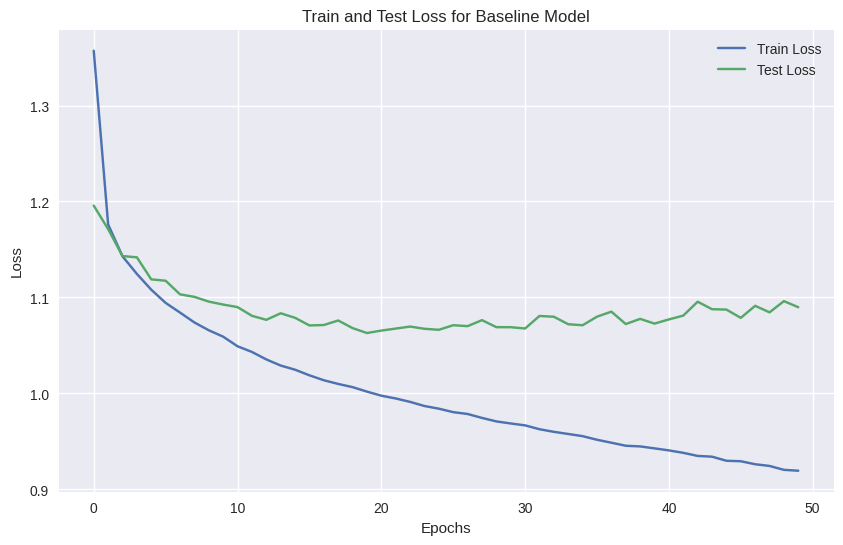

In [40]:
plt.figure(figsize = (10, 6))
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss for Baseline Model')
plt.legend()
plt.show();

**Optimized MLP**

In [41]:
# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

# Defining the MLP model. Reference from: References I use: https://pytorch.org/docs/stable/nn.html
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_p = 0.005):  # This is the 'MLP' class constructor
        super(MLP, self).__init__() # This line is for PyTorch to initialise the 'MLP' class as a neural network
        self.fc1 = nn.Linear(input_size, hidden_sizes[0]) # This line creates the first linear layer and assigns it as an attribute of the instance
        self.dropout1 = nn.Dropout(dropout_p) # Randomly switch off neurons during training to prevent over-fitting.
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1]) # Transforms the output of the first hidden layer to the size of the second hidden layer
        self.dropout2 = nn.Dropout(dropout_p) # Create another dropout layer with the same probability
        self.fc3 = nn.Linear(hidden_sizes[1], output_size) # Creates the third and final linear layer that transforms the output of the second hidden layer to the desired output size

# Reference from: https://discuss.pytorch.org/t/f-relu-and-nn-relu/123071
    def forward(self, x): # Defines the forward propagation logic
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# This block creates the MLP model
input_size = X_train_processed.shape[1]
hidden_sizes = [100, 50]
output_size = len(y_train.unique())

model = MLP(input_size, hidden_sizes, output_size)

# Defining the loss function and the optimiser
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay = 1e-5) # Regularización con L2

# Function to calculate the accuracy. Reference from: https://pytorch.org/docs/stable/generated/torch.max.html
def calculate_accuracy(y_true, y_pred):
    _, predicted = torch.max(y_pred, 1)
    correct = (predicted == y_true).sum().item()
    return correct / y_true.size(0)

# An empty list is initialised to store train and test losses
train_losses = []
test_losses = []

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience = 2)

best_loss = float('inf')
patience_num = 10  # Number of epochs to wait after the last validation loss has ceased to improve
trigger_times = 0

# Trainng of the model. Reference from: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html
epochs = 30 # Stablish the number of epochs
# Training loop
for epoch in range(epochs):
    model.train()  # The model is set to training mode
    train_loss = 0.0
    train_acc = 0.0

    for inputs, labels in train_loader: # All data batches are run through
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # Calculate the loss gradients with respect to the model parameters
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        train_acc += calculate_accuracy(labels, outputs) * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)

    # Eval mode for calculating test loss and accuracy
    model.eval()
    test_loss = 0.0
    test_acc = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            test_acc += calculate_accuracy(labels, outputs) * inputs.size(0)

    test_loss /= len(test_loader.dataset)
    test_acc /= len(test_loader.dataset)

    # Call scheduler to adjust the learning rate based on test_loss
    scheduler.step(test_loss)

    # To determine if the model should apply the early stopping or not
    if test_loss < best_loss:
        best_loss = test_loss
        trigger_times = 0
    else:
        trigger_times += 1

    if trigger_times >= patience_num:
        print('Early stopping!')
        break

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_acc:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_acc:.4f}')


Epoch 1/30, Train Loss: 1.32, Train Accuracy: 0.50, Test Loss: 1.21, Test Accuracy: 0.5245
Epoch 2/30, Train Loss: 1.17, Train Accuracy: 0.55, Test Loss: 1.17, Test Accuracy: 0.5559
Epoch 3/30, Train Loss: 1.14, Train Accuracy: 0.56, Test Loss: 1.14, Test Accuracy: 0.5674
Epoch 4/30, Train Loss: 1.12, Train Accuracy: 0.57, Test Loss: 1.12, Test Accuracy: 0.5746
Epoch 5/30, Train Loss: 1.10, Train Accuracy: 0.57, Test Loss: 1.11, Test Accuracy: 0.5715
Epoch 6/30, Train Loss: 1.09, Train Accuracy: 0.58, Test Loss: 1.11, Test Accuracy: 0.5715
Epoch 7/30, Train Loss: 1.08, Train Accuracy: 0.58, Test Loss: 1.09, Test Accuracy: 0.5799
Epoch 8/30, Train Loss: 1.07, Train Accuracy: 0.59, Test Loss: 1.09, Test Accuracy: 0.5815
Epoch 9/30, Train Loss: 1.06, Train Accuracy: 0.59, Test Loss: 1.09, Test Accuracy: 0.5744
Epoch 10/30, Train Loss: 1.05, Train Accuracy: 0.59, Test Loss: 1.10, Test Accuracy: 0.5775
Epoch 11/30, Train Loss: 1.05, Train Accuracy: 0.59, Test Loss: 1.08, Test Accuracy: 0.58

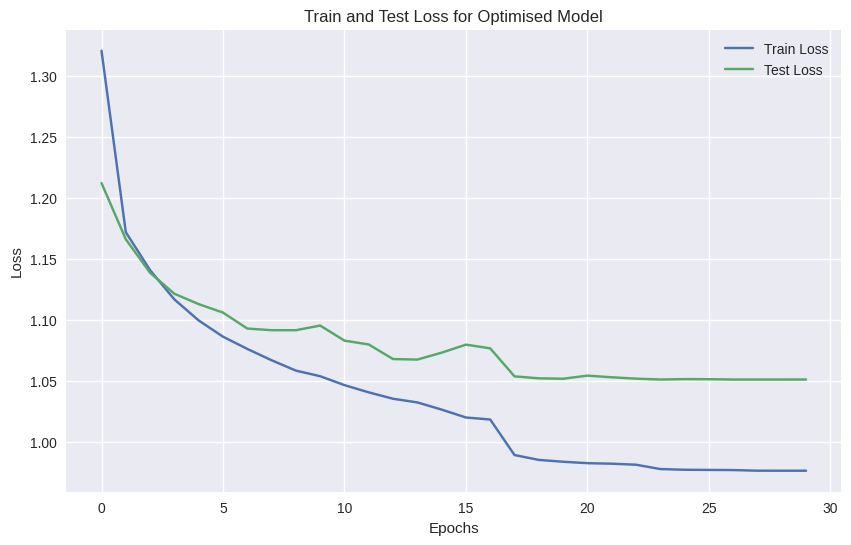

In [42]:
plt.figure(figsize = (10, 6))
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss for Optimised Model')
plt.legend()
plt.show();

# SVM


In [43]:
pip install optuna # To be able to use it, I needed to import Optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.4 MB/s eta 0:00:00


In [44]:
# All the libraries used for the SVM model
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**Baseline for the SVM**

In [45]:
# Create the SVM baseline model with a RBF kernel. I used as a reference https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
# And also I used https://scikit-learn.org/stable/modules/svm.html
svm_model = SVC(kernel = 'rbf',
                C = 1.0)

# This is to trian the model with the training data
svm_model.fit(X_train_processed, y_train)

# Predict labels for the test set
y_test_pred = svm_model.predict(X_test_processed)
y_train_pred = svm_model.predict(X_train_processed)

# To calculate the accuracy for the trainng and test set
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Accuracy:", test_accuracy)
#print("\nClassification report:\n", classification_report(y_test, y_test_pred))


# Generate the classification_report as a dictionary
report_dict = classification_report(y_test, y_test_pred, output_dict=True)

# Function to change the format of the percentage of the classification report
def format_percentage(value):
    return "{:.2f}%".format(value * 100) if isinstance(value, float) else value

# Applying formatting to the report dictionary
for key, values in report_dict.items():
    if isinstance(values, dict):
        report_dict[key] = {k: format_percentage(v) for k, v in values.items()}
    else:
        report_dict[key] = format_percentage(values)
# Reference from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
report_df = pd.DataFrame(report_dict).transpose()

print("Classification Report:")
print(report_df)

Accuracy: 0.5763333333333334
Classification Report:
             precision  recall f1-score support
Alternative     43.95%  37.12%   40.25%    1498
Anime           74.07%  71.55%   72.79%    1529
Blues           61.50%  54.50%   57.79%    1545
Classical       82.52%  84.92%   83.71%    1479
Country         53.43%  56.31%   54.83%    1481
Electronic      65.62%  59.93%   62.65%    1535
Hip-Hop         45.70%  53.42%   49.26%    1492
Jazz            54.45%  51.52%   52.95%    1483
Rap             45.67%  36.73%   40.71%    1492
Rock            50.27%  70.53%   58.70%    1466
accuracy        57.63%  57.63%   57.63%  57.63%
macro avg       57.72%  57.65%   57.36%   15000
weighted avg    57.79%  57.63%   57.39%   15000


**GridSearch for the SVM**

In [ ]:
# I defined the parameter range for grid search. I used as a reference https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee
# And also I used: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Create a SVC model for the GridSearch
svc = SVC()

# Create the GridSearchCV
grid_search = GridSearchCV(estimator = svc,
                           param_grid = param_grid,
                           cv = 3,
                           scoring = 'accuracy',
                           verbose = 2)

# Train the model with the training set
grid_search.fit(X_train_processed, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

In [46]:
# I create the SVM model with an RBF kernel
# This is the model with the best hyperparameters acording the GridSearch
svm_model = SVC(kernel = 'rbf',
                C = 1,
                gamma = 'scale',
                degree = 2)

# The model training on the training data
svm_model.fit(X_train_processed, y_train)

# Predict labels for the test set
y_pred = svm_model.predict(X_test_processed)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_test, y_pred)) # Classification report

Accuracy: 0.5763333333333334

Classification report:
               precision    recall  f1-score   support

 Alternative       0.44      0.37      0.40      1498
       Anime       0.74      0.72      0.73      1529
       Blues       0.62      0.54      0.58      1545
   Classical       0.83      0.85      0.84      1479
     Country       0.53      0.56      0.55      1481
  Electronic       0.66      0.60      0.63      1535
     Hip-Hop       0.46      0.53      0.49      1492
        Jazz       0.54      0.52      0.53      1483
         Rap       0.46      0.37      0.41      1492
        Rock       0.50      0.71      0.59      1466

    accuracy                           0.58     15000
   macro avg       0.58      0.58      0.57     15000
weighted avg       0.58      0.58      0.57     15000



**Cross validation for the SVM with Optuna**

In [ ]:
# I define the search space with the respective hyperparameters and values. I sued as reference: https://scikit-learn.org/stable/modules/cross_validation.html
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    kernel = trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly'])
    degree = trial.suggest_int('degree', 1, 5) if kernel == 'poly' else 3

    # This creates and trains the SVC model
    model = SVC(C=C, gamma=gamma, kernel=kernel, degree=degree)
    score = cross_val_score(model, X_train_processed, y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()

    return accuracy

In [ ]:
# This is to optimize the hyperparameters
study = optuna.create_study(direction = 'maximize') # To create a sesion of hyperparameters optimization
study.optimize(objective, n_trials = 100) # Define the amount of trials

print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

In [48]:
# Create the SVM optimized model with a RBF kernel and the Optuna hyperparameters
svm_model = SVC(kernel = 'rbf',
                C = 1.0430364858922985,
                gamma = 'scale')

# Train the model and fit it to the trainng data
svm_model.fit(X_train_processed, y_train)

# Predict labels for the test set
y_test_pred = svm_model.predict(X_test_processed)

# Accuracy of the testing data
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
#print("\nClassification report:\n", classification_report(y_test, y_pred))

# Generate the classification_report as a dictionary
report_dict = classification_report(y_test, y_test_pred, output_dict = True)

# Function to change the format of the percentage of the classification report
def format_percentage(value):
    return "{:.2f}%".format(value * 100) if isinstance(value, float) else value

# Applying formatting to the report dictionary
for key, values in report_dict.items():
    if isinstance(values, dict):
        report_dict[key] = {k: format_percentage(v) for k, v in values.items()}
    else:
        report_dict[key] = format_percentage(values)

report_df = pd.DataFrame(report_dict).transpose()

print("Classification Report:")
print(report_df)

Accuracy: 0.5763333333333334
Classification Report:
             precision  recall f1-score support
Alternative     44.11%  37.52%   40.55%    1498
Anime           74.30%  71.48%   72.87%    1529
Blues           61.50%  54.50%   57.79%    1545
Classical       82.62%  85.19%   83.89%    1479
Country         53.42%  56.38%   54.86%    1481
Electronic      65.81%  60.07%   62.81%    1535
Hip-Hop         45.76%  53.22%   49.21%    1492
Jazz            54.58%  51.45%   52.97%    1483
Rap             45.56%  36.80%   40.71%    1492
Rock            50.22%  70.53%   58.67%    1466
accuracy        57.69%  57.69%   57.69%  57.69%
macro avg       57.79%  57.71%   57.43%   15000
weighted avg    57.86%  57.69%   57.46%   15000
